d:\hands_on_machine_learning\C4 - Training Models\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


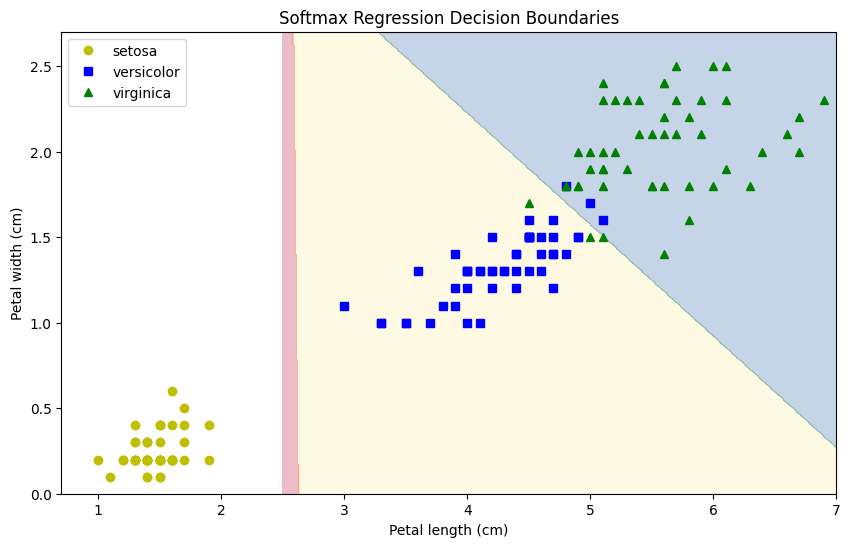

In [1]:
# Softmax Regression (Multinomial Logistic Regression)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Extract petal length and petal width as features (2D input)
X = iris["data"][:, 2:]  # petal length and petal width
y = iris["target"]  # Target classes (Setosa, Versicolor, Virginica)

# Train a multinomial logistic regression classifier (Softmax Regression)
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# Create a meshgrid for plotting decision boundaries
x0, x1 = np.meshgrid(
    np.linspace(2.5, 7, 500),  # petal length range
    np.linspace(0, 2.7, 500)   # petal width range
)
X_new = np.c_[x0.ravel(), x1.ravel()]  # Combine into 2D feature matrix

# Predict the class probabilities on the grid
y_proba = softmax_reg.predict_proba(X_new)

# Predict the class with highest probability at each grid point
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

# Plot the decision boundaries with all classes
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, zz, cmap=plt.cm.Spectral, alpha=0.3)  # Filled contour
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label=iris.target_names[0])
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label=iris.target_names[1])
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label=iris.target_names[2])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Softmax Regression Decision Boundaries")
plt.legend()
plt.show()